<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_3_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.849999,28.115667,52.384670,41.971608,-0.002340,201.319603,201.321344,-0.001741
1,0.0,1.0,77.481088,25.208490,26.918671,84.706973,-0.004278,224.310945,224.314322,-0.003378
2,0.0,2.0,99.634044,25.047451,20.932438,27.904199,0.003587,183.521720,183.517782,0.003938
3,0.0,3.0,58.176823,82.464060,29.561567,47.350342,0.000120,227.552912,227.552528,0.000384
4,0.0,4.0,56.442929,35.225975,63.740764,25.411469,-0.002070,190.819067,190.820576,-0.001510
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.758136,56.540160,63.426370,33.885191,-0.000105,201.609752,201.609666,0.000086
29996,999.0,26.0,84.092365,53.206172,96.928304,38.684647,-0.000555,282.910934,282.911018,-0.000084
29997,999.0,27.0,54.748936,86.362589,57.448120,45.422415,0.000139,253.982199,253.982187,0.000012
29998,999.0,28.0,24.288372,40.037930,31.648440,72.898037,-0.000706,178.872073,178.872481,-0.000408


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.849999  28.115667  52.384670  41.971608 -0.002340  201.319603   
      1.0    77.481088  25.208490  26.918671  84.706973 -0.004278  224.310945   
      2.0    99.634044  25.047451  20.932438  27.904199  0.003587  183.521720   
      3.0    58.176823  82.464060  29.561567  47.350342  0.000120  227.552912   
      4.0    56.442929  35.225975  63.740764  25.411469 -0.002070  190.819067   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.758136  56.540160  63.426370  33.885191 -0.000105  201.609752   
      26.0   84.092365  53.206172  96.928304  38.684647 -0.000555  282.910934   
      27.0   54.748936  86.362589  57.448120  45.422415  0.000139  253.982199   
      28.0   24.288372  40.037930  31.648440  72.898037 -0.000706  178.872073   
      29.0   20.164561  53.755854  77.966980  51.208305 -0.000140  213.095560   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.321344 -0.001741  
      1.0    224.314322 -0.003378  
      2.0    183.517782  0.003938  
      3.0    227.552528  0.000384  
      4.0    190.820576 -0.001510  
...                 ...       ...  
999.0 25.0   201.609666  0.000086  
      26.0   282.911018 -0.000084  
      27.0   253.982187  0.000012  
      28.0   178.872481 -0.000408  
      29.0   213.095467  0.000093  

[30000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.849999  28.115667  52.384670  41.971608 -0.002340  201.319603   
      1.0    77.481088  25.208490  26.918671  84.706973 -0.004278  224.310945   
      2.0    99.634044  25.047451  20.932438  27.904199  0.003587  183.521720   
      3.0    58.176823  82.464060  29.561567  47.350342  0.000120  227.552912   
      4.0    56.442929  35.225975  63.740764  25.411469 -0.002070  190.819067   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.758136  56.540160  63.426370  33.885191 -0.000105  201.609752   
      26.0   84.092365  53.206172  96.928304  38.684647 -0.000555  282.910934   
      27.0   54.748936  86.362589  57.448120  45.422415  0.000139  253.982199   
      28.0   24.288372  40.037930  31.648440  72.898037 -0.000706  178.872073   
      29.0   20.164561  53.755854  77.966980  51.208305 -0.000140  213.095560   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.321344 -0.001741  
      1.0    224.314322 -0.003378  
      2.0    183.517782  0.003938  
      3.0    227.552528  0.000384  
      4.0    190.820576 -0.001510  
...                 ...       ...  
999.0 25.0   201.609666  0.000086  
      26.0   282.911018 -0.000084  
      27.0   253.982187  0.000012  
      28.0   178.872481 -0.000408  
      29.0   213.095467  0.000093  

[30000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.849999,28.115667,52.384670,41.971608,-0.002340,201.319603,201.321344,-0.001741
1,0.0,1.0,77.481088,25.208490,26.918671,84.706973,-0.004278,224.310945,224.314322,-0.003378
2,0.0,2.0,99.634044,25.047451,20.932438,27.904199,0.003587,183.521720,183.517782,0.003938
3,0.0,3.0,58.176823,82.464060,29.561567,47.350342,0.000120,227.552912,227.552528,0.000384
4,0.0,4.0,56.442929,35.225975,63.740764,25.411469,-0.002070,190.819067,190.820576,-0.001510
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.758136,56.540160,63.426370,33.885191,-0.000105,201.609752,201.609666,0.000086
29996,999.0,26.0,84.092365,53.206172,96.928304,38.684647,-0.000555,282.910934,282.911018,-0.000084
29997,999.0,27.0,54.748936,86.362589,57.448120,45.422415,0.000139,253.982199,253.982187,0.000012
29998,999.0,28.0,24.288372,40.037930,31.648440,72.898037,-0.000706,178.872073,178.872481,-0.000408


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.849999  28.115667  52.384670  41.971608 -0.002340  201.319603   
      1.0    77.481088  25.208490  26.918671  84.706973 -0.004278  224.310945   
      2.0    99.634044  25.047451  20.932438  27.904199  0.003587  183.521720   
      3.0    58.176823  82.464060  29.561567  47.350342  0.000120  227.552912   
      4.0    56.442929  35.225975  63.740764  25.411469 -0.002070  190.819067   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   37.758136  56.540160  63.426370  33.885191 -0.000105  201.609752   
      26.0   84.092365  53.206172  96.928304  38.684647 -0.000555  282.910934   
      27.0   54.748936  86.362589  57.448120  45.422415  0.000139  253.982199   
      28.0   24.288372  40.037930  31.648440  72.898037 -0.000706  178.872073   
      29.0   20.164561  53.755854  77.966980  51.208305 -0.000140  213.095560   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    201.321344 -0.001741  
      1.0    224.314322 -0.003378  
      2.0    183.517782  0.003938  
      3.0    227.552528  0.000384  
      4.0    190.820576 -0.001510  
...                 ...       ...  
999.0 25.0   201.609666  0.000086  
      26.0   282.911018 -0.000084  
      27.0   253.982187  0.000012  
      28.0   178.872481 -0.000408  
      29.0   213.095467  0.000093  

[30000 rows x 8 columns]

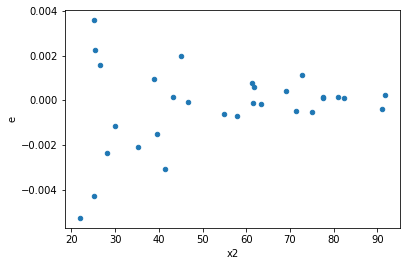

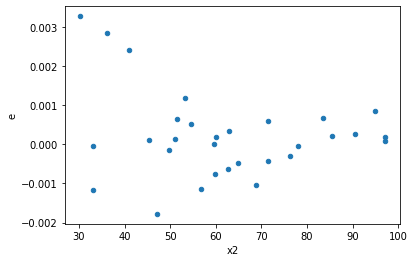

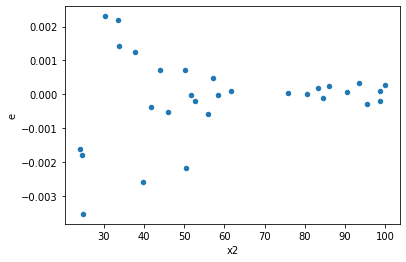

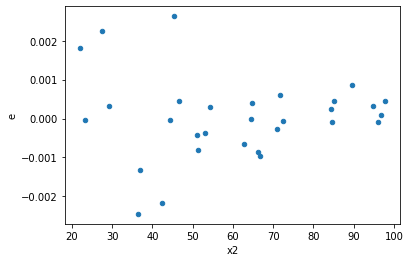

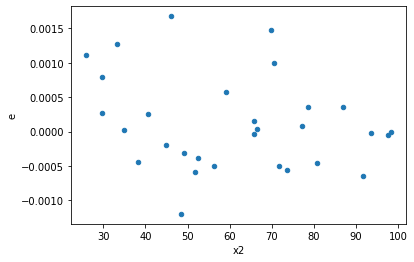

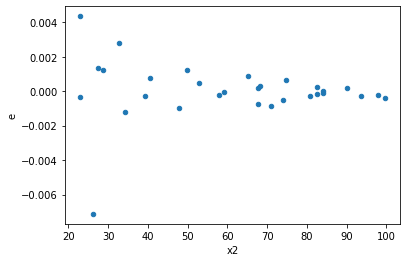

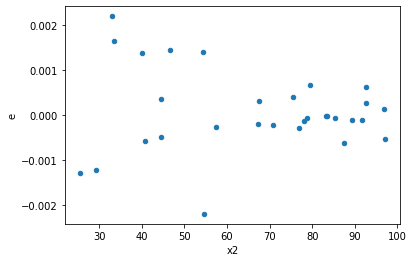

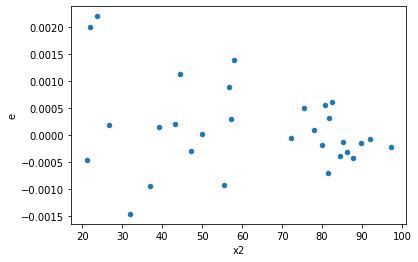

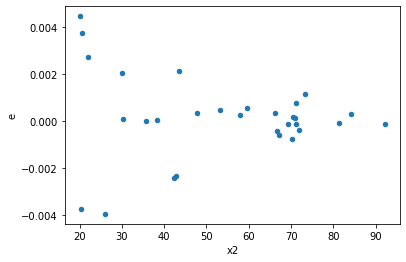

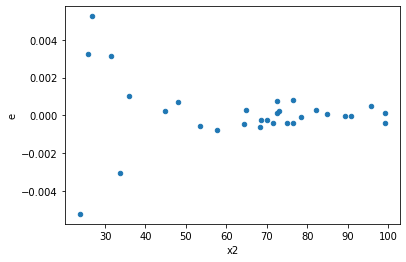

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,15.0,7.013514461947272e-07,7.299261539217999e-05,1.0019306374210389e-07,4.866174359478666e-06,48.56797644200359,6.998060797513972e-09,0.9999999965009696,3.499030398756986e-09,Reject005=0 : Heteroscedasticity
1.0,10.0,12.0,9.844092816772883e-06,1.797889931157126e-05,9.844092816772883e-07,1.498241609297605e-06,1.5219702182661485,0.4849160575373883,0.7575419712313058,0.24245802876869416,Reject005=1 : Homoscedasticity
3.0,5.0,17.0,1.0219784665268324e-06,2.5645945658670636e-05,2.043956933053665e-07,1.5085850387453316e-06,7.380708538176049,0.0015307866496527822,0.9992346066751736,0.0007653933248263911,Reject005=0 : Heteroscedasticity
4.0,9.0,13.0,3.974830299069944e-06,6.1931730568040426e-06,4.4164781100777157e-07,4.763979274464648e-07,1.0786828680513527,0.8740003249760353,0.5629998375119823,0.43700016248801765,Reject005=1 : Homoscedasticity
5.0,10.0,12.0,1.4349676243610975e-06,7.803476157562271e-05,1.4349676243610975e-07,6.502896797968559e-06,45.31737641721288,1.1319587112090801e-07,0.9999999434020644,5.6597935560454005e-08,Reject005=0 : Heteroscedasticity
6.0,9.0,13.0,7.054378353098584e-07,2.1101780464505046e-05,7.838198170109538e-08,1.6232138818850036e-06,20.709018152603296,5.33836699045942e-06,0.9999973308165048,2.66918349522971e-06,Reject005=0 : Heteroscedasticity
7.0,12.0,10.0,2.837919845691115e-06,9.696488656504934e-06,2.364933204742596e-07,9.696488656504935e-07,4.100111004006272,0.032716747904413035,0.9836416260477935,0.016358373952206517,Reject005=0 : Heteroscedasticity
9.0,8.0,14.0,1.0579477242721263e-05,4.343484921708369e-05,1.322434655340158e-06,3.102489229791692e-06,2.3460435018573125,0.15579229994250898,0.9221038500287455,0.07789614997125449,Reject005=1 : Homoscedasticity
11.0,10.0,12.0,3.108651466833272e-06,1.6663041752160722e-05,3.108651466833272e-07,1.3885868126800603e-06,4.46684624344391,0.017103483121270635,0.9914482584393647,0.008551741560635318,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,15.0,7.013514461947272e-07,7.299261539217999e-05,1.0019306374210389e-07,4.866174359478666e-06,48.56797644200359,6.998060797513972e-09,Reject005=0 : Heteroscedasticity
1.0,10.0,12.0,9.844092816772883e-06,1.797889931157126e-05,9.844092816772883e-07,1.498241609297605e-06,1.5219702182661485,0.4849160575373883,Reject005=1 : Homoscedasticity
2.0,15.0,7.0,3.865058231495021e-05,2.3843027974486844e-07,2.5767054876633474e-06,3.4061468534981205e-08,0.013218999492980246,2.9226084140576197e-10,Reject005=0 : Heteroscedasticity
3.0,5.0,17.0,1.0219784665268324e-06,2.5645945658670636e-05,2.043956933053665e-07,1.5085850387453316e-06,7.380708538176049,0.0015307866496527822,Reject005=0 : Heteroscedasticity
4.0,9.0,13.0,3.974830299069944e-06,6.1931730568040426e-06,4.4164781100777157e-07,4.763979274464648e-07,1.0786828680513527,0.8740003249760353,Reject005=1 : Homoscedasticity
5.0,10.0,12.0,1.4349676243610975e-06,7.803476157562271e-05,1.4349676243610975e-07,6.502896797968559e-06,45.31737641721288,1.1319587112090801e-07,Reject005=0 : Heteroscedasticity
6.0,9.0,13.0,7.054378353098584e-07,2.1101780464505046e-05,7.838198170109538e-08,1.6232138818850036e-06,20.709018152603296,5.33836699045942e-06,Reject005=0 : Heteroscedasticity
7.0,12.0,10.0,2.837919845691115e-06,9.696488656504934e-06,2.364933204742596e-07,9.696488656504935e-07,4.100111004006272,0.032716747904413035,Reject005=0 : Heteroscedasticity
8.0,9.0,13.0,2.028673305092222e-05,1.3834056986892908e-05,2.2540814501024685e-06,1.064158229760993e-06,0.47210282916467694,0.26257279011730394,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    569
Reject005=1 : Homoscedasticity      431
Name: Result_test, dtype: int64